In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression

Supplementary Fig. 15d


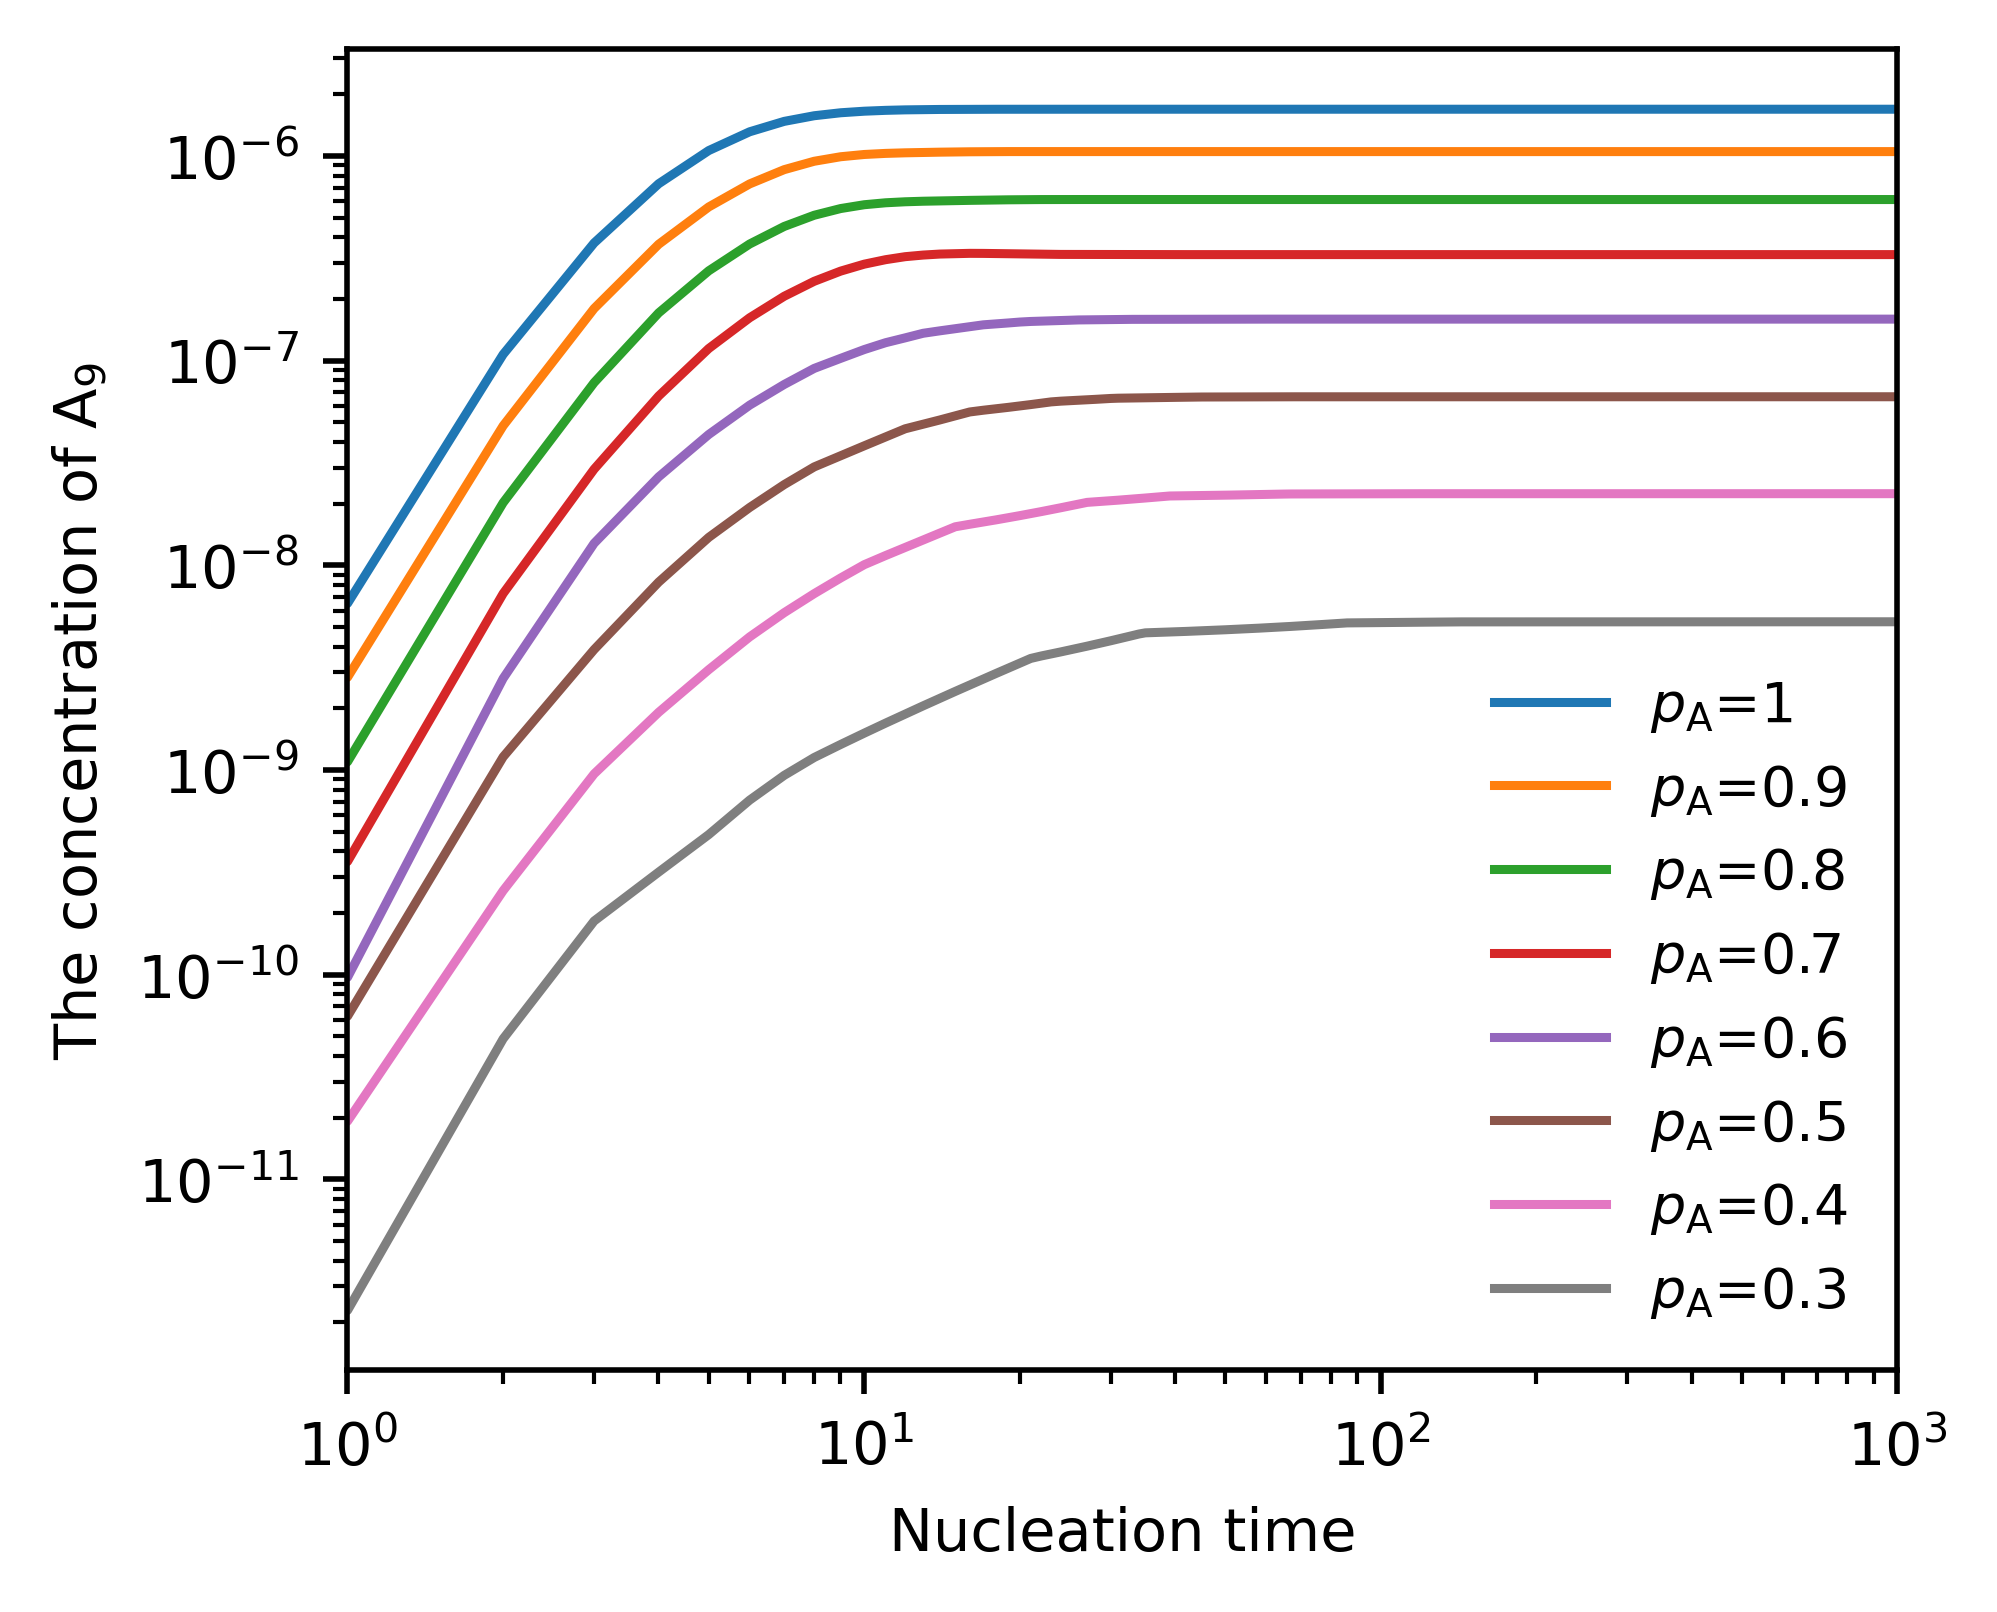

Supplementary Fig. 15b


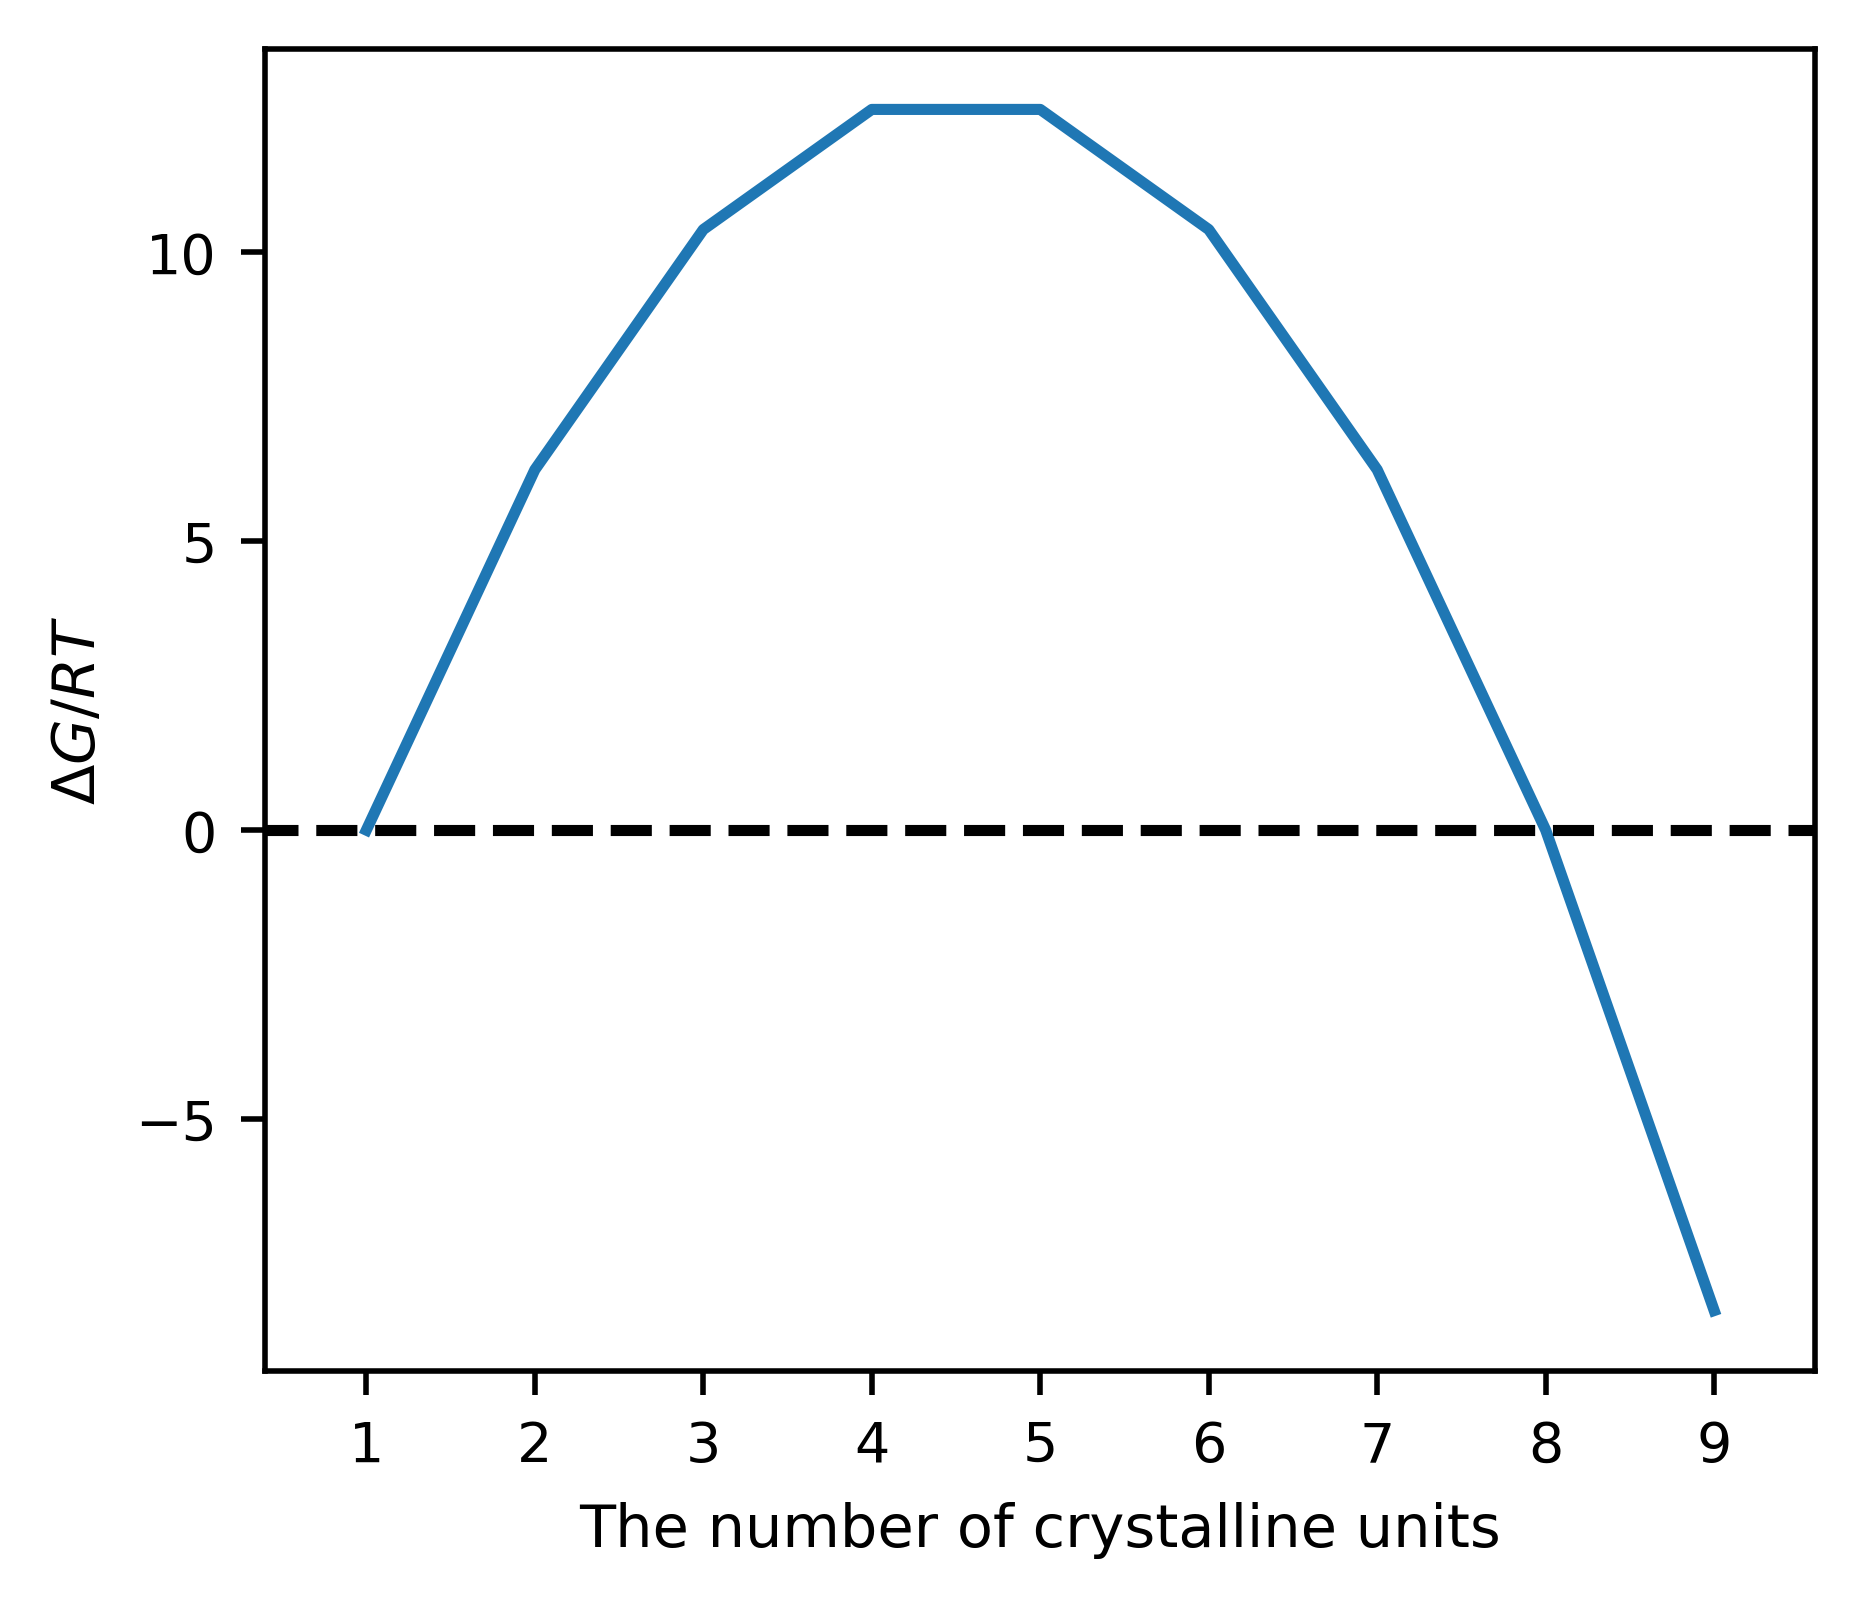

Supplementary Fig. 15e
lnpA= [0.0, -0.10536051565782628, -0.2231435513142097, -0.3566749439387323, -0.5108256237659905, -0.6931471805599451, -0.9162907318741548, -1.2039728043259355]
lnJ'= [-13.289317457480205, -13.87147706082708, -14.528612693761554, -15.28169831707661, -16.161748590833824, -17.21737772659624, -18.531086310179152, -20.259994912375717]
slope= 5.783716912739027
standard error= 0.03440022624674614


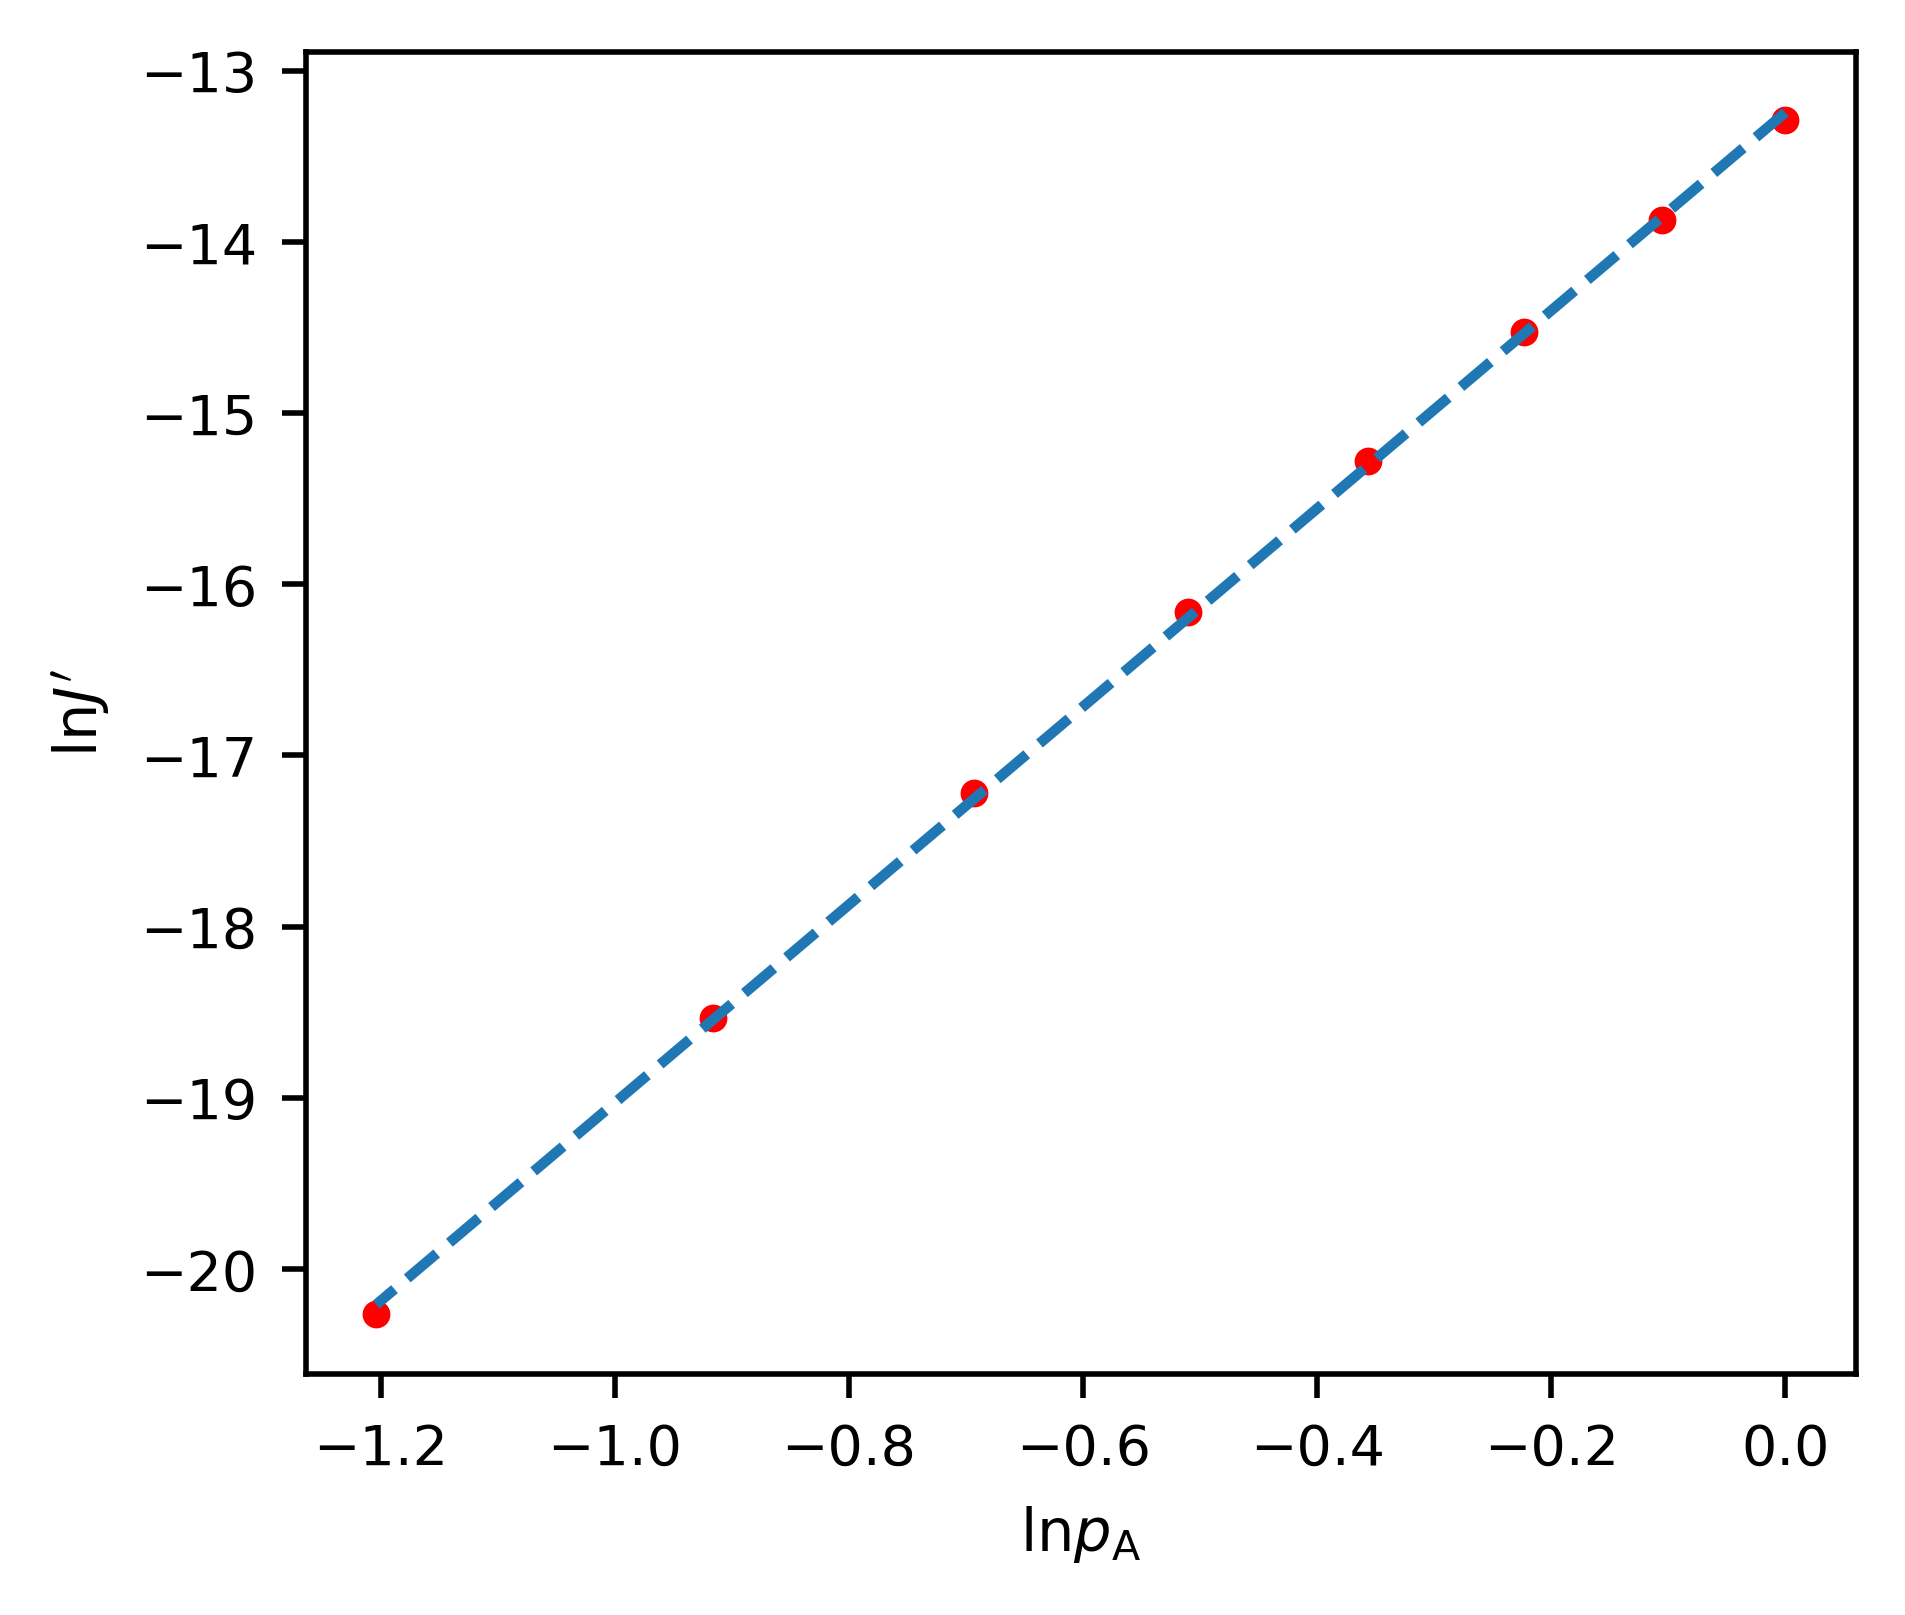

In [2]:
ki_forward=1        # ki_forward represents the forward rate at step i of attaching a motif
ki_backward=[0]     # ki_backward represents the backward rate at step i of detaching a motif
for a in range(1,9):         
    ki_backward.append(8**(4-a))    
ki_backward.append(0)
len_ki_backward=len(ki_backward)
# print("ki_backward=",ki_backward)
# print("length of ki_backward=",len_ki_backward)

kAiB_backward=[1E6]*len_ki_backward    
kAiB_backward[0]=0
len_kAiB_backward=len(kAiB_backward)

k_backward=ki_backward
k_backward.extend(kAiB_backward)
len_k_backward=len(k_backward)
# print("kAiB_backward=",kAiB_backward)
# print("length of kAiB_backward=",len_kAiB_backward)
# print("k_backward=",k_backward)
# print("length of k_backward=",len_k_backward)


print("Supplementary Fig. 15d")
plt.figure(figsize=(4,3.5),dpi=500)
t=0
list1=[]     # list1 is used to store the logarithm of the concentration c of crystallizable units in the system
list2=[]     # list2 is used to store the logarithm of the nucleation flux of the system represented by the formation flux of clusters A10, J'=[A9]*ki_forward*c
for c in np.arange(1,0.2,-0.1):    # c represents the concentration pA of crystallizable units in the system
    matrix=np.zeros((len_k_backward,len_k_backward))
    for i in range(len_k_backward):           
        for j in range(len_k_backward):
            if i in range(0,len_ki_backward) and j in range(0,len_ki_backward):
                if i==j:
                    matrix[i][j]=-k_backward[i]-1
                if i==j-1:
                    matrix[i][j]=k_backward[j]
                if i==j+1:
                    matrix[i][j]=c
                if i==0:
                    matrix[i][j]=0
                if i==len_ki_backward-2 and j==len_ki_backward-1: 
                    matrix[i][j]=0
                if i==len_ki_backward-1 and j==len_ki_backward-1:
                    matrix[i][j]=-c
            if i in range(0,len_ki_backward) and j in range(len_ki_backward,len_k_backward):
                if i==j-(len_ki_backward+1):
                    matrix[i][j]=k_backward[j]
                if i==0:
                    matrix[i][j]=0
            if i in range(len_ki_backward,len_k_backward) and j in range(0,len_ki_backward):
                if i==j+(len_ki_backward+1):
                    matrix[i][j]=(1-c)   
            if i in range(len_ki_backward,len_k_backward) and j in range(len_ki_backward,len_k_backward):
                if i==j:
                    matrix[i][j]=-k_backward[j]-k_backward[j-len_ki_backward-1]-c
                if i==len_ki_backward+1 and j==len_ki_backward+1:
                    matrix[i][j]=-k_backward[j]-c
                if i==j+1:
                    matrix[i][j]=c
                if i==j-1:
                    matrix[i][j]=k_backward[i-len_ki_backward]
                if i==len_ki_backward:
                    matrix[i][j]=0
                if j==len_ki_backward:
                    matrix[i][j]=0
    t=t+1
    
    init_y=np.zeros_like(k_backward)
    init_y[0]=c
    init_y[len_ki_backward]=1-c
    # print("init_y")
    # print(init_y)

    def diff_func(y, g):
        return matrix.dot(y)
    
    x = np.linspace(0, 1000, 1000)
    y = odeint(diff_func, init_y, x)

    list1.append(np.log(c))
    list2.append(np.log(y[-1,len_ki_backward-2]*ki_forward*c))     # y[-1,len_ki_backward-2]*c calculates the formation flux of clusters A10 at the steady state of nucleation

    plt.plot(x, y[:,len_ki_backward-2],label=r'$p_\mathrm{A}$=%g'%c,linewidth=1.3)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nucleation time",fontsize=8.5)
plt.ylabel("The concentration of A$_9$",fontsize=8.5)
plt.tick_params(labelsize=8.5)
plt.legend(loc="lower right")
plt.rcParams.update({'font.size':8})
plt.legend(frameon=False)
plt.xlim([1,1000])
plt.rcParams["xtick.direction"]="out"
plt.rcParams["ytick.direction"]="out"
plt.show()


print("Supplementary Fig. 15b")
plt.figure(figsize=(4,3.5),dpi=500)
list_x=[1]
list_x.extend(np.arange(2,len_ki_backward,1))
list_y=[0]
list_y.extend(np.cumsum(np.log(k_backward[1:len_ki_backward-1])))    
plt.plot(list_x,list_y,0,-1,0,linewidth="1.6")  
list_empty1=[0]*((len_ki_backward)+1)
plt.plot(np.arange(0,len_ki_backward+1,1),list_empty1,color="k",linewidth = '1.6',linestyle="--")
plt.xticks(range(1,len_ki_backward,1))
plt.xlabel("The number of crystalline units",fontsize=8.5)
plt.ylabel("Δ$G$/$RT$",fontsize=8.5)
plt.xlim([0.4,len_ki_backward-0.4])
plt.rcParams["xtick.direction"]="out"
plt.rcParams["ytick.direction"]="out"
plt.show()


print("Supplementary Fig. 15e")
plt.figure(figsize=(4,3.5),dpi=500)
plt.plot(list1,list2,"r .")
fit_result=st.linregress(list1,list2)
print("lnpA=",list1)
print("lnJ'=",list2)
print("slope=",fit_result[0])
print("standard error=",fit_result[-1])
fit_y=fit_result.slope*np.asarray(list1)+fit_result.intercept
plt.plot(list1,fit_y,"--")
plt.xlabel(r'ln$p_\mathrm{A}$',fontsize=8.5)
plt.ylabel("ln$\it{J'}$",fontsize=8.5)
plt.rcParams["xtick.direction"]="out"
plt.rcParams["ytick.direction"]="out"